## 1. 模型验证与选择

模型选择是机器学习中的重要环节，涉及到的操作包括数据集切分、模型验证与超参数搜索等。对应常用函数包括：

- train_test_split：常用操作之一，切分数据集和测试集，可设置切分比例

- cross_val_score：交叉验证，默认K=5折，相当于把数据集平均切分为5份，并逐一选择其中一份作为测试集、其余作为训练集进行训练及评分，最后返回K个评分
- GridSearchCV：调参常用方法，通过字典类型设置一组候选参数，并制定度量标准，最后返回评分最高的参数


### 1.1 数据集分割

#### 数据分割的原因：为了更客观的评估模型的性能，最简单的办法就是测试数据不能使平时的训练数据，我们在评估结果的时候，使用的数据集不能是训练的数据集，这样就需要在寻来开始对总数据集进行分类，一部分用来训练， 一部分用来验证。

**留出集**：用来测试的数据需要从数据集中预先留出来，我们把这类数据集叫做**留出集**。

数据集的划分有两种方法：

- 自己实现；
- 使用sklearn工具实现（方便）

sklearn提供的常用方法有：


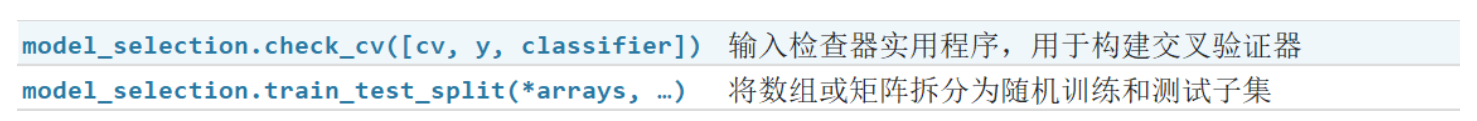



In [1]:
# 例1 自己编码实现数据的前切分

from sklearn.datasets import *
import numpy as np

X,y=load_iris(return_X_y=True)


#print(X)
#print(y)

#训练数据切片分割
X_train=X[0:-20]
X_test=X[-20:]


#对标记切片分割
y_train=y[:-20]
y_test=y[-20:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(130, 4)
(20, 4)
(130,)
(20,)


#### sklearn用来切分数据的工具是sklearn.model_selection.train_test_split()

**函数原型**

```
  train_test_split(X,y, test_size=0.25,Train_size=None,random_state=None,shuffle=True,,stratify=None)
  
```

    - X,y :切分的数据源；
    - test_size 和train_size 用来分别设定测试集和训练集的大小；
    - shuffle:是否对数据集进行随机重排切分；
    - random_state: 设定随机的种子
    - 分层采样策略（保证类别也保持比例），如果shuffle的值为False，stratify的值必选为None

从数据集中划分出一部分数据用作训练，剩下一部分数据用于测试，这种方法成为留出法（hold-out）

In [2]:
# 例2-1 sklearn.model_selection.train_test_split

from sklearn.model_selection import train_test_split
import numpy 

data=np.linspace(1,100,10000)
y=np.random.randint(0,1,10000)

X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.33,shuffle=True, random_state=3)

print("训练集维度：{}".format(X_train.shape))
print("测试集维度：{}".format(X_test.shape))
print("训练集标记维度.{}".format(y_train.shape))
print("训练集标记维度.{}".format(y_test.shape))

训练集维度：(6700,)
测试集维度：(3300,)
训练集标记维度.(6700,)
训练集标记维度.(3300,)


## 1.2 模型验证

在测试数据集上验证模型的性能称为模型验证。常见的验证有：

- 基本验证：将数据集分为训练集和测试集，在训练集上训练模型，在测试集上评价模型的性能；
- 交叉检验：训练集和测试集的脚色轮选，分别训练模型和测试，以模型的平均值作为模型的性能评价。

In [7]:
# 例：基本验证

# 导入数据集分类工具
# sklearn 0.2 y以上版本移入model_selection包中

# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# 加载数据
iris = load_iris()

X = iris.data
y = iris.target

#使用ｋ临近分类器
#选择k临近模型
#这样的模型还有很多......也是我们学习的主要任务
from sklearn.neighbors import KNeighborsClassifier

#配置超参数n_neighbors=3
model  = KNeighborsClassifier(n_neighbors=3)


#训练集和测试集各占50%
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5)


#使用一部分用来训练
model.fit(X1, y1)

#　使用另一部分测试
y2_model = model.predict(X2)

#对留出集的预测后的结果和原来真实值进行对比，本质就是算两个值相等的比值
rst = accuracy_score(y2, y2_model)
print(y2)
print(y2_model)
acc=len(y2[y2==y2_model])/len(y2)
print(acc)



print("模型准确率：{}％".format(rst * 100))


[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 1 1 1 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1]
0.9333333333333333
模型准确率：93.33333333333333％



### 1.1.2 交叉验证

**引入交叉验证的原因**：

- 在数据偏少的情况容易出现过拟合或者欠拟合的情况；
- 没有在有限的数据中获得本来应该获取的信息，数据没有充分利用；


#### 交叉验证基本思路

解决这一问题的方法是交叉验证，让数据的每个子集即是训练集又是验证集合,基本方法如下：

计算总共分为两轮
第一轮X1为训练集，X2是测试集
第二轮X2为训练集，X1是测试集
这样虽然多了一轮工作，但使模型得到了充分训练。

In [4]:
# 例3

#这里用两轮验证，轮流用一般数据作为留出集

y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)

rst1 = accuracy_score(y1, y1_model)
rst2 = accuracy_score(y2, y2_model)

print("模型1准确率：{}％".format(rst1 * 100))
print("模型2准确率：{}％".format(rst2 * 100))

模型1准确率：98.66666666666667％
模型2准确率：93.33333333333333％


以上交叉验证共进行了两轮，最终结果可以把两次结合计算，比如求平均值，称为两折交叉验证。
#### k-则交叉验证

对两轮交叉验证的概念可以扩展，比如五轮交叉验证，即每次选取 20% 作为留出集，这样可以进行五轮。 或者可以理解成分成五等份，每次一份(20%)用来作为留出集，其余四份作为训练集。

**交叉验证用到的函数有：

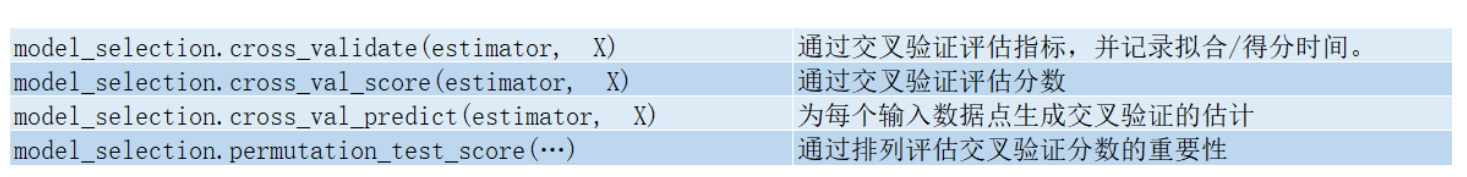

sklearn.model_selection.cross_val_value()**

```
   cross_val_score(estimator,X,y=None,group=None,scoring=None,cv=none,n_jobs=None)
```

    - estimator:用户数据拟合的方法对象；
    - X：自变量数据；
    - y: 因变量数据；
    - scoring:验证的方式；
    - cv:确定K则交叉中的K值；
    - n_jobs:设定用于验证的CPU核心数目

In [5]:
# sklearn 0.2 以后版本移入model_selection包
# from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score


# sklearn.model_selection.cross_val_score(estimator, X, y=None, 
#                                          scoring=None, cv=None, 
#                                          n_jobs=1, verbose=0, 
#                                          fit_params=None, 
#                                          pre_dispatch=‘2*n_jobs’)
# estimator：数据对象
# X：数据
# y：预测数据
# soring：调用的方法
# cv：交叉验证生成器或可迭代的次数
# n_jobs：同时工作的cpu个数（-1代表全部）
# verbose：详细程度
# fit_params：传递给估计器的拟合方法的参数
# pre_dispatch：控制并行执行期间调度的作业数量。减少这个数量对于避免在CPU发送更多作业时CPU内存消耗的扩大是有用的。该参数可以是：
#     - 没有，在这种情况下，所有的工作立即创建并产生。将其用于轻量级和快速运行的作业，以避免由于按需产生作业而导致延迟
#     - 一个int，给出所产生的总工作的确切数量
#     - 一个字符串，给出一个表达式作为n_jobs的函数，如'2 * n_jobs'

# 5则交叉
rst = cross_val_score(model, X, y, cv=5)
print("模型准确率：{}".format(rst * 100))
final_score=np.mean(rst)
print("模型分数：{}".format(final_score))

模型准确率：[ 96.66666667  96.66666667  93.33333333  96.66666667 100.        ]
模型分数：0.9666666666666668


## 1.3 参数调优

在机器模型中有两种参数：

- 模型参数：这种参数是模型中从数据中得到的参数，比如线性分类中的斜率和截距；
- 超参数：程序院员更加经验设定的参数，比如KNN中的K，RandomForrest中随机树的数目；

参数调用是用来确定机器学习模型中超参数的，模型参数是模型训练时得到。sklearn中提供的参数调优方法主要有：

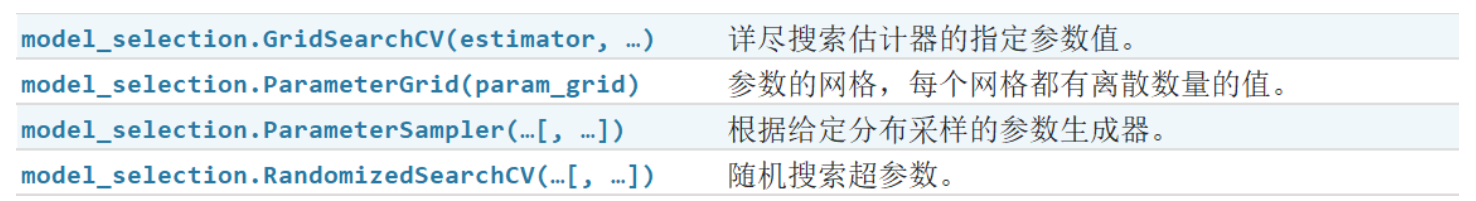

在这个部分，我们以GridSearchCV为例进行讲解。

GridSearchCV的名字其实可以拆分为两部分，GridSearch和CV，即网格搜索和交叉验证。这两个名字都非常好理解。网格搜索，搜索的是参数，即在指定的参数范围内，按步长依次调整参数，利用调整的参数训练学习器，从所有的参数中找到在验证集上精度最高的参数，这其实是一个训练和比较的过程。

GridSearchCV可以保证在指定的参数范围内找到精度最高的参数，但是这也是网格搜索的缺陷所在，他要求遍历所有可能参数的组合，在面对大数据集和多参数的情况下，非常耗时。

**应用场景**：

　Grid Search：一种调参手段；穷举搜索：在所有候选的参数选择中，通过循环遍历，尝试每一种可能性，表现最好的参数就是最终的结果。其原理就像是在数组里找到最大值。这种方法的主要缺点是比较耗时！

　　所以网格搜索适用于**三四个（或者更少）的超参数**（当超参数的数量增长时，网格搜索的计算复杂度会呈现指数增长，这时候则使用随机搜索），用户列出一个较小的超参数值域
  
    ```
        sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring=None,n_jobs=None,iid=’warn’, refit=True, cv=’warn’, 
                 verbose=0, pre_dispatch=‘2*n_jobs’, error_score=’raise-deprecating’, return_train_score=False)

    ```
   （1） estimator :选择使用的分类器，并且传入除需要确定最佳的参数之外的其他参数。
   
   （2） param_grid: 需要最优化的参数的取值，值为字典或者列表。
   
   （3） scoring=None:模型评价标准，默认None。根据所选模型不同，评价准则不同。比如scoring=”accuracy”。如果是None，则使用estimator的误差估计函数。

   （4） n_jobs=1 进程个数，默认为1。 若值为 -1，则用所有的CPU进行运算。 若值为1，则不进行并行运算，这样的话方便调试。

   （5） cv=None:交叉验证参数，默认None，使用三折交叉验证。


In [14]:
#例 KNN算法

#手写数字knn实现

import numpy as np
from sklearn import datasets

#从sklearn 加载数据
digits = datasets.load_digits()
x = digits.data
y = digits.target

#数据切分，20%用作测试集
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#引入模型
from sklearn.neighbors import KNeighborsClassifier

#'超参数设定，并训练模型
knn_clf = KNeighborsClassifier(n_neighbors=5)

#训练模型
knn_clf.fit(x_train,y_train)

#评估模型分数
print(knn_clf.score(x_test,y_test))


0.9805555555555555


In [13]:
#例 手动搜索

best_score=0
best_k=-1

#设定K值的范围在1-10之间
for k in range(1,11):
    
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(x_train,y_train)
    score = knn_clf.score(x_test,y_test)
    print("k:{};score{}".format(k,score))
    if score > best_score:
        best_k = k
        best_score = score
        
print("best_k = ",best_k)
print("best_score = ",best_score)

k:1;score0.9805555555555555
k:2;score0.9805555555555555
k:3;score0.9805555555555555
k:4;score0.975
k:5;score0.975
k:6;score0.9694444444444444
k:7;score0.9722222222222222
k:8;score0.9666666666666667
k:9;score0.9694444444444444
k:10;score0.9694444444444444
best_k =  1
best_score =  0.9805555555555555


In [15]:
# 上面的例子中k取值为1,2,3时相同，这次可以考虑每个节点的权值用来分类
best_method = ""
best_score=0
best_k=-1
for method in ("uniform","distance"):
    for k in range(1,11):
        '''加入weight参数'''
        knn_clf = KNeighborsClassifier(n_neighbors=k,weights = method)
        knn_clf.fit(x_train,y_train)
        score = knn_clf.score(x_test,y_test)
        if score > best_score:
            best_k = k
            best_score = score
            best_method = method
print("best_method is",best_method)            
print("best_k = ",best_k)
print("best_score = ",best_score)

best_method is uniform
best_k =  1
best_score =  0.9861111111111112


In [17]:
#GridsearchCV 可以一条命令让我们完成搜索

param_grid=[
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1,11)]
        
    }
]
knn_clf = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(knn_clf,param_grid)#实例化一个网格搜索对象，1指定对哪个分类器进行网格搜索，2搜索参数是什么

grid_search.fit(x_train,y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)

0.9881702477739063
{'n_neighbors': 3, 'weights': 'uniform'}


## 1.4 学习曲线与验证曲线：绘制分数来评价模型

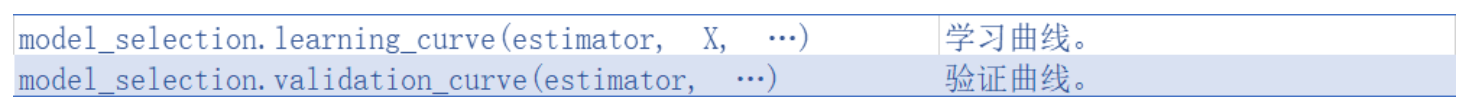



### 1.4.1 概念

- 标准差（std）：数据集数据和数据值平均值偏离的平均值，用来评估数据集数据的分散程度；
- 方差(variance)：标准差的平方，物理意义同标准差；

- 协方差(convariance)：用来判断两个随机变量的相关性。

- 偏差（bias）:偏差又成为表现误差，用来评估数据集数据和评估数据平均值的差，用来衡量评估模型的精度；

- 误差（error）:预测值与真实值之间的差的差异，用来衡量评测结果的准确率

- 欠拟合：学习能力太弱，无论训练结果还是测试结果都不好，可以通过增加数据大小和数据特征解决；

- 过拟合：学习能力太强（模型过于复杂），在测试集上表现好，在测试集上表现不好。

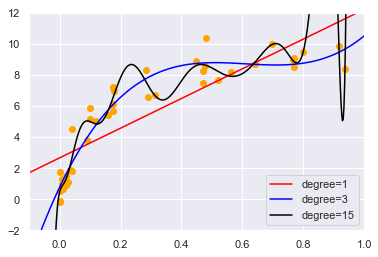

数据科学家发现，寻找合适的模型的过程就是一个寻找方差和偏差均衡点的过程


- 学习曲线：学习曲线就是通过画出不同训练集大小时交叉验证的准确率，可以看到模型在新数据上的表现，进而来判断模型是否方差偏高或偏差过高，以及增大训练集是否可以减小过拟合。

### 1.4.2 作用

- 学习曲线：学习曲线就是通过画出不同训练集大小时训练集和交叉验证的准确率，可以看到模型在新数据上的表现，进而来判断模型是否方差偏高或偏差过高，以及增大训练集获调整特征是否可以减小过拟合。
- 验证曲线：验证曲线用来选择超参数,验证不同参数下模型的准确率。

学习曲线验的具体作用：
   - **数据在特定模型固定参数上的表现，数据的特征对特定模型表现的影响**。

   - 影响模型表现的另一个重要因素是**训练数据**。
   
在sklearn.model_selection中学习曲线的函数为：

```
learning_curve(estimator, X, y, groups=None, train_sizes=array([0.1, 0.33, 0.55, 0.78, 1. ]), cv=’warn’, scoring=None, exploit_incremental_learning=False, n_jobs=None, pre_dispatch=’all’, verbose=0, shuffle=False, random_state=None, error_score=’raise-deprecating’)

```
**输入重要参数**：

- estimator:需要传入模型对象，例如：RandomForestRegression（）、SVC(gamma=0.001)

- X：需传入特征矩阵

- y：需传入标签

- cv：可以传多种格式参数：
（1）、整数：指定KFold中的折数，如cv=5，意为将x特征矩阵分为5份，最终分数也会有5份
（2）、None：默认为3折交叉验证
（3）、分割器：例如ShuffleSplit(n_splits=50,test_size=0.2,random_state=0)
即按照传入分割器进行分割

- n_jobs:需要同时运行的CPU数，如果是-1，则调用所有CPU进行计算

**输出**
- train_sizes_abs：返回生成的训练的样本数，如[ 10 , 100 , 1000 ]

- train_scores:返回训练集分数，该矩阵为（ len ( train_sizes_abs ) , cv分割数 ）维的分数，每行数据代表该样本数对应不同折的分数

- test_scores:同train_scores,只不过是这个对应的是测试集分数


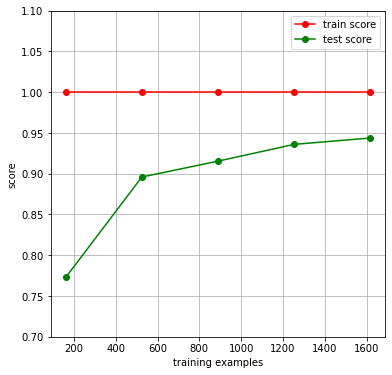

In [8]:
# 例  学习曲线

from sklearn.datasets import load_digits # 导入手写数字集
from sklearn.model_selection import learning_curve # 导入学习曲线类
from sklearn.ensemble import RandomForestClassifier

fig,ax=plt.subplots(1,1,figsize=(6,6)) # 设置画布和子图
data=load_digits()
x,y=data.data,data.target # 加载特征矩阵和标签

train_sizes,train_scores,test_scores=learning_curve(RandomForestClassifier(n_estimators=50),x,y,cv=10,n_jobs=4)
# 设置分类器为随机森林，x，y，5折交叉验证，cpu同时运算为4个
ax.set_ylim((0.7,1.1)) # 设置子图的纵坐标的范围为（0.7~1.1）
ax.set_xlabel("training examples") # 设置子图的x轴名称
ax.set_ylabel("score")
ax.grid() # 画出网图
ax.plot(train_sizes,np.mean(train_scores,axis=1),'o-',color='r',label='train score')
# 画训练集数据分数，横坐标为用作训练的样本数，纵坐标为不同折下的训练分数的均值
ax.plot(train_sizes,np.mean(test_scores,axis=1),'o-',color='g',label='test score')
ax.legend(loc='best') # 设置图例

plt.show()

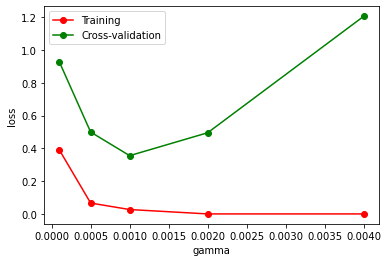

In [10]:
# 例： 利用验证曲线，确定适合的参数

from sklearn.model_selection import validation_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()
X = digits.data
y = digits.target

param_range = [0.0001, 0.0005, 0.001, 0.002, 0.004]
# 使用param_name设置待调参数名称，param_range设置待调参数的取值范围
train_loss, test_loss = validation_curve(
    SVC(), X, y, param_name='gamma', param_range=param_range, cv=10,
    scoring='neg_mean_squared_error')
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

plt.plot(param_range, train_loss_mean, 'ro-', label='Training')
plt.plot(param_range, test_loss_mean, 'go-', label='Cross-validation')
plt.xlabel('gamma')
plt.ylabel('loss')
plt.legend()
plt.show()
